---------
- # 요약
    - 새로운 내용임
    - 개요 참조
---------

# Videos
- 2d 이미지에 시간 차원을 추가한 형태임
- 기존 3d 텐서에 시간 차원을 추가한 4d 텐서를 사용함
- 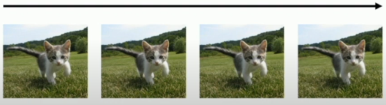

## Video Classification
- 입력된 4d 텐서 비디오를 바탕으로 클래스 추정함
- 입력된 영상이 어떤 행동을 하는지 예측함


### 난점
1. 비디오 용량이 매우 큼
    - 보통 30fps이상의 값 가짐
        - 미압축시  해상도별로 1.5~10+GB용량을 가지게 됨
        - GPU 메모리에 올리는 과정이 난점이 생김
    - 해결법
        - 매우 짧은 클립 형태의 비디오를 학습시킴
        - 프레임 속도를 매우 느리게 함
        - 다운샘플링해 해상도를 줄임
        - 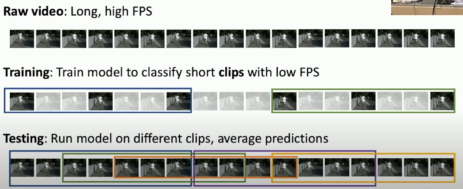

### 분류 모델
#### SIngle-Frame CNN
- 각 비디오 프레임 별개로 분류 진행함
- 생각보다 괜찮게 작동하고, 영상 분류의 기초로 작동함
- 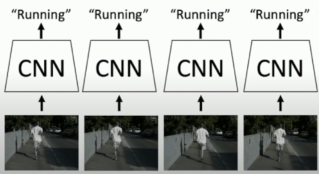

#### Late Fusion(with FC layers)
- 각 프레임에 대해 CNN 연산후 합쳐 FC 레이어를 통과시킴
- 많은 fc 레이어를 사용할경우 과적합 유발할수 있음
- 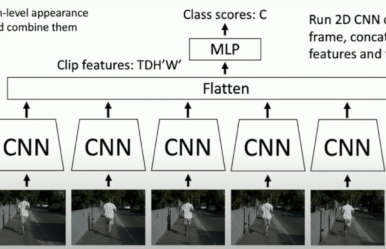

#### Late Fusion(with pooling)
- fc 레이어 을 평균 풀링으로 대체함
- 풀링 과정에서 데이터가 선호하는 특징을 남기게 됨
- CNN 통해 특징 추출 후 이를통해 움직임을 예측하므로, 프레임 간 낮은 수준의 특징 상호작용이나 미세한 움직임을 포착하기 어려움
- Late Fusion 구조의 다른 형태들 또한 비슷한 문제를 공유함


#### Early Fusion
- CNN 연산 이전에 영상 프레임을 융합해 CNN의 입력으로 사용함
- 채널 차원에 프레임을 융합해 $3*H*W$ 크기의 프레임을 $3T*H*W$의 프레임 입력으로 변형함
- 하나의 2d CNN 레이어만으론 상호작용을 모델링하기 부족할 수 있다는 문제점이 있음
- 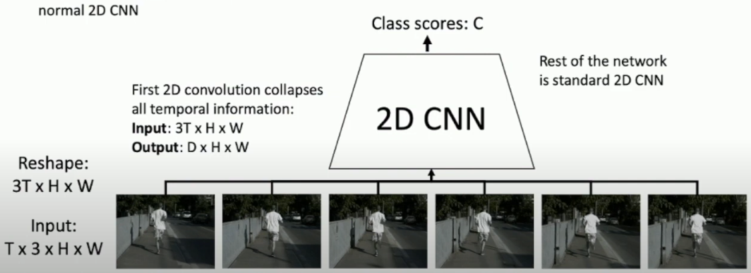

#### 3D CNN
- 복셀 그리드 처리과정과 비슷함
- 2d CNN 대신 3d CNN 사용함
- 이떄 추가되는 차원은 시간 차원 $T$ 가 됨
- 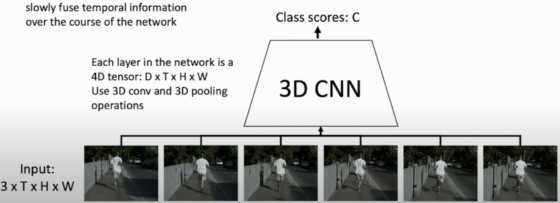

### 모델 별 구조 비교
- 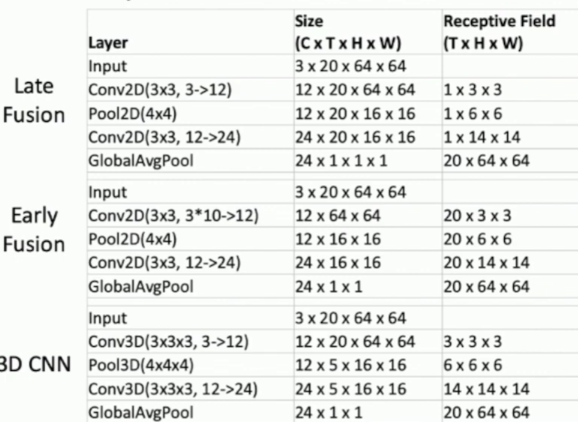
    - late fusion 과 early fusion의 신경망은 비슷하나 T 차원 축소시점이 다름을 볼수있음
        - 이 떄문에 수용 영역에서도 차이가 보임
    - 3d CNN 은 풀링 과정에 T 차원 또한 축소했음이 보임
        - 이러한 점 때문에 slow fusion 이라고도 불림

- 2D Conv(Early fusion) vs 3D Conv
    - early fusion은 초기에 모든 시간축에 대해 수용영역을 확장시키고 3d cnn 은 점진적으로 확장시킴
    - Temporal Shift Invaince
        - 시간적 패턴이 어느 시점에 나타나는지 상관없이 똑같이 인식됨을 의미함
            - 영상의 시작 지점, 중간지점, 끝 지점과 상관없이 동일하게 인식함을 의미
        - Early fusion은 시간적 이동 불변성이 없으며, 다른 시간 지점에서 동일한 동작을 인식하려면 별개의 필터를 학습시켜야 함

### 데이터셋
- Sports-1M
    - 레이블된 유튜브 스포츠 영상임